In [94]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
df: DataFrame = pd.read_csv('data/moscow_apartment_listings.csv')
df.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


## Описательный анализ данных:
Мы рассчитаем основные статистические показатели (среднее, медиану, стандартное отклонение и т.д.) для каждого числового столбца в нашем датасете. Это поможет нам лучше понять распределение и характеристики данных.

In [96]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', ' тыс.', ' мил.'][magnitude])

df_normal: DataFrame = df[['price', 'repair', 'house_age', 'dist_to_subway', 'footage', 'floor', 'rooms']]
df2: DataFrame = df_normal.describe()
for frame in df2:
    df2[frame] = df2[frame].apply(human_format)

df2

,price,repair,house_age,dist_to_subway,footage,floor,rooms
count,12.18 тыс.,12.18 тыс.,12.18 тыс.,12.18 тыс.,12.18 тыс.,12.18 тыс.,12.18 тыс.
mean,10.87 мил.,2.27,36.36,928.35,46.15,6.87,1.60
std,3.04 мил.,0.79,21.41,532.44,10.54,5.31,0.49
min,4.90 мил.,1.00,0.00,11.00,30.10,1.00,1.00
25%,8.50 мил.,2.00,17.00,548.00,38.00,3.00,1.00
50%,10.20 мил.,2.00,42.00,820.00,44.50,5.00,2.00
75%,12.70 мил.,3.00,54.00,1.18 тыс.,53.40,9.00,2.00
max,20.00 мил.,4.00,130.00,2.99 тыс.,89.90,38.00,2.00


### Вывод:
    Цена (price): Средняя цена квартиры составляет примерно 10.87 миллиона рублей, со стандартным отклонением 3.04 миллиона рублей. Минимальная цена - 4.9 миллиона рублей, максимальная - 20 миллионов рублей.

    Состояние ремонта (repair): Среднее значение состояния ремонта близко к 2, что указывает на то, что большинство квартир имеют среднее качество ремонта.

    Возраст дома (house_age): Средний возраст дома составляет около 36 лет, со стандартным отклонением в 21 год.

    Расстояние до метро (dist_to_subway): В среднем квартиры находятся на расстоянии около 928 метров от метро.

    Площадь квартир (footage): Средняя площадь квартиры составляет около 46 квадратных метров.

    Этаж (floor) и максимальное количество этажей (max_floor): Средний этаж, на котором расположена квартира, - это 7-й этаж, при этом в здании в среднем 13 этажей.

    Количество комнат (rooms): Большинство квартир имеют 1 или 2 комнаты.

# Визуализация распределения ключевых переменных

/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


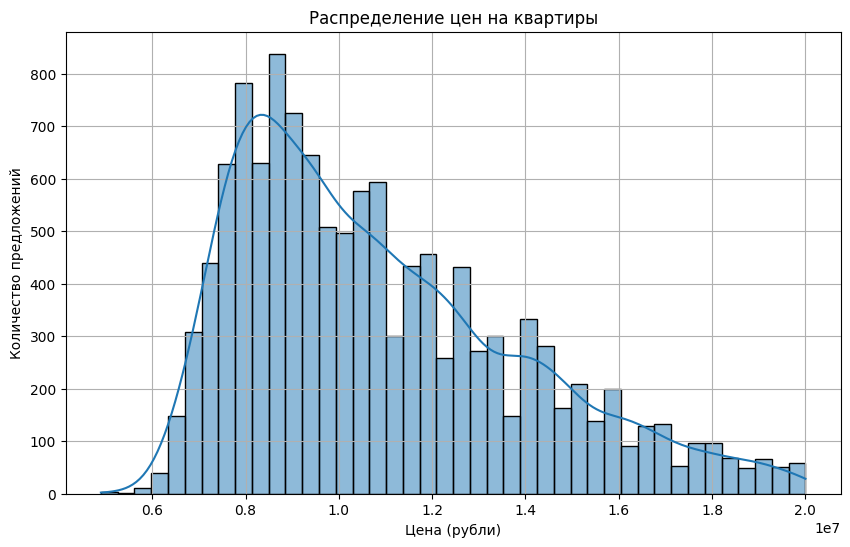

/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


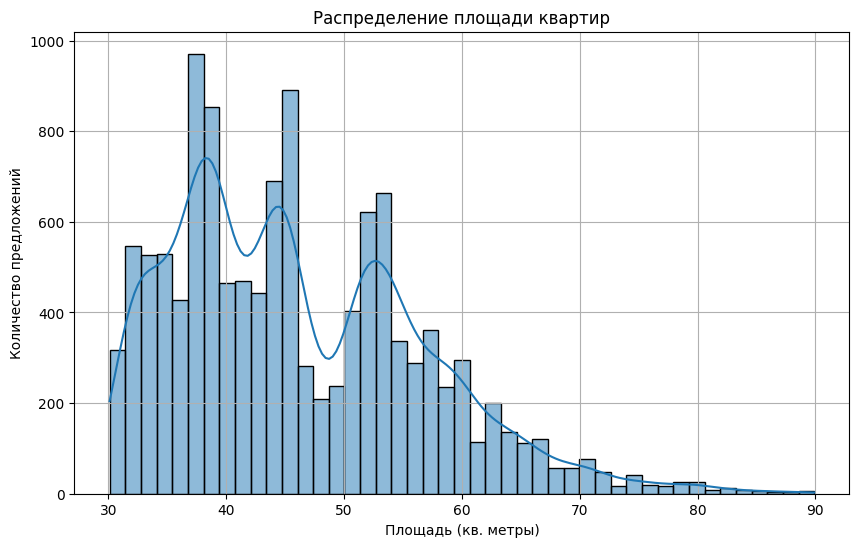

/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


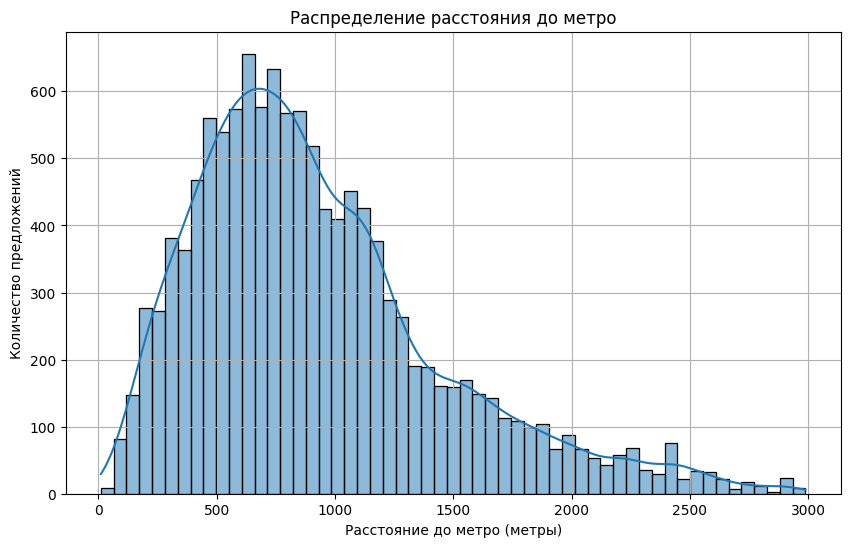

In [97]:
# Визуализация распределения ключевых переменных

# Гистограмма цен
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена (рубли)')
plt.ylabel('Количество предложений')
plt.grid(True)
plt.show()

# Гистограмма площади квартир
plt.figure(figsize=(10, 6))
sns.histplot(df['footage'], kde=True)
plt.title('Распределение площади квартир')
plt.xlabel('Площадь (кв. метры)')
plt.ylabel('Количество предложений')
plt.grid(True)
plt.show()

# Гистограмма расстояния до метро
plt.figure(figsize=(10, 6))
sns.histplot(df['dist_to_subway'], kde=True)
plt.title('Распределение расстояния до метро')
plt.xlabel('Расстояние до метро (метры)')
plt.ylabel('Количество предложений')
plt.grid(True)
plt.show()


## Проведем корреляционный анализ

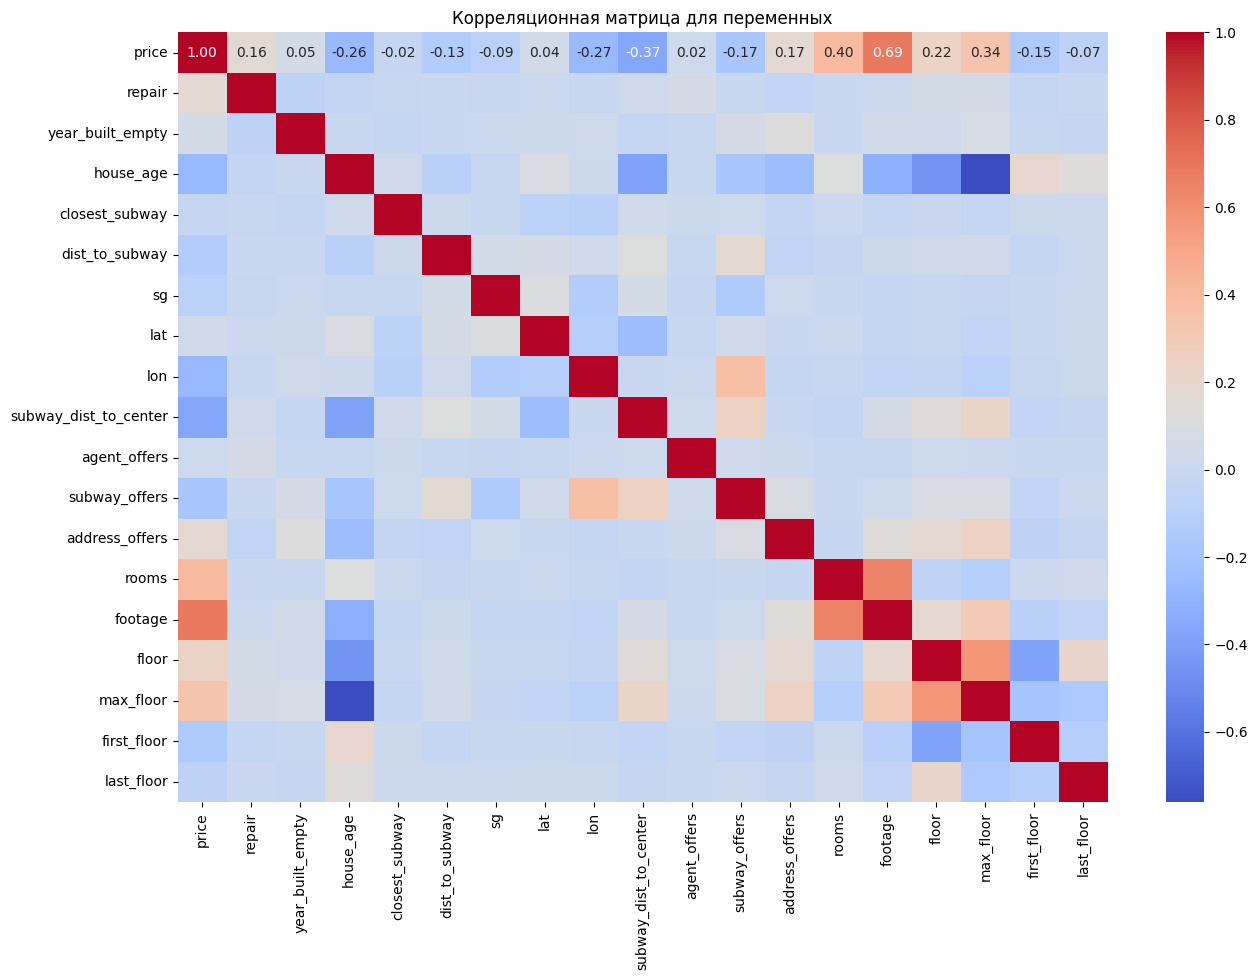

In [98]:
correlation_df: DataFrame = df.drop(['AO', 'hm', 'h3'], axis=1)

# Вычисление коэффициентов корреляции
correlation_matrix:float = correlation_df.corr()

# Создание тепловой карты для визуализации коэффициентов корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица для переменных')
plt.show()

На тепловой карте корреляционной матрицы представлены коэффициенты корреляции Пирсона между различными переменными в нашем датасете. Вот некоторые ключевые наблюдения:

    Корреляция с ценой (price):
        Площадь квартиры (footage) имеет сильную положительную корреляцию с ценой. Это означает, что с увеличением площади квартиры, как правило, увеличивается и её цена.
        Количество комнат (rooms) также положительно коррелирует с ценой, что логично, так как больше комнат обычно означает большую площадь.
        Расстояние до метро (dist_to_subway) имеет отрицательную корреляцию с ценой, что может указывать на то, что квартиры, расположенные ближе к метро, стоят дороже.

    Другие интересные корреляции:
        Возраст дома (house_age) имеет отрицательную корреляцию с ценой, что может говорить о том, что более новые квартиры стоят дороже.
        Этаж (floor) и максимальный этаж в здании (max_floor) имеют положительную корреляцию, что может отражать предпочтения покупателей квартир на более высоких этажах.

## Ящик с усами

/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/likimiad/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


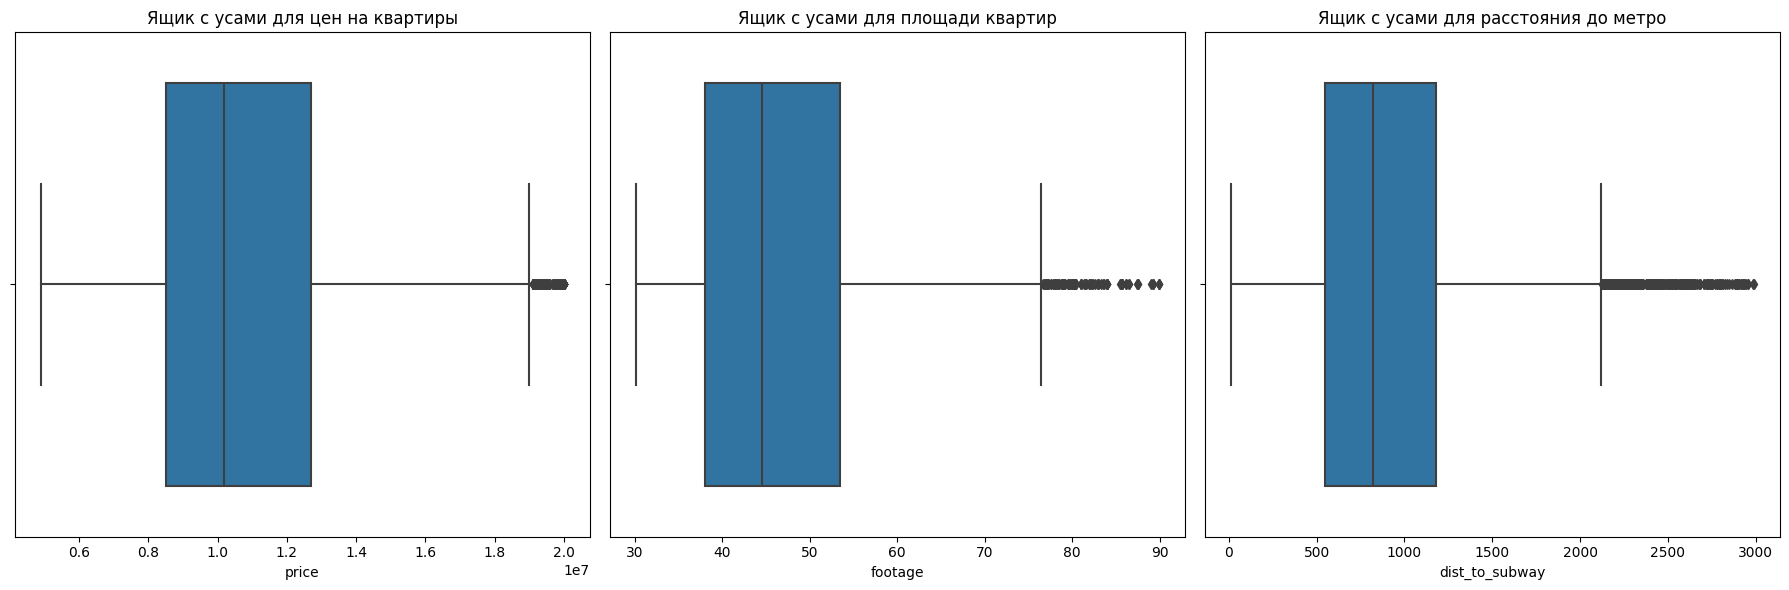

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Ящик с усами для цены
sns.boxplot(ax=axes[0], x=df['price'])
axes[0].set_title('Ящик с усами для цен на квартиры')

# Ящик с усами для площади квартир
sns.boxplot(ax=axes[1], x=df['footage'])
axes[1].set_title('Ящик с усами для площади квартир')

# Ящик с усами для расстояния до метро
sns.boxplot(ax=axes[2], x=df['dist_to_subway'])
axes[2].set_title('Ящик с усами для расстояния до метро')

plt.tight_layout()
plt.show()

Ящик с усами для цен на квартиры

    График показывает, что большинство цен находятся в пределах определенного диапазона, но также существует ряд выбросов с очень высокой стоимостью. Эти выбросы могут быть связаны с квартирами особо высокого класса или с уникальными характеристиками.

Ящик с усами для площади квартир

    Площадь квартир также имеет несколько выбросов, особенно для очень больших квартир. Это могут быть квартиры с нестандартной планировкой или роскошные апартаменты.

Ящик с усами для расстояния до метро

    Распределение расстояния до метро более компактное, но также содержит выбросы, относящиеся к квартирам, расположенным далеко от станций метро.

## Обработка выбросов

In [100]:
# Определение границ выбросов для цены
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Определение границ выбросов для площади
Q1_footage = df['footage'].quantile(0.25)
Q3_footage = df['footage'].quantile(0.75)
IQR_footage = Q3_footage - Q1_footage
lower_bound_footage = Q1_footage - 1.5 * IQR_footage
upper_bound_footage = Q3_footage + 1.5 * IQR_footage

# Определение границ выбросов для расстояния до метро
Q1_dist = df['dist_to_subway'].quantile(0.25)
Q3_dist = df['dist_to_subway'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
lower_bound_dist = Q1_dist - 1.5 * IQR_dist
upper_bound_dist = Q3_dist + 1.5 * IQR_dist

# Фильтрация данных для удаления выбросов
filtered_data = df[
    (df['price'] >= lower_bound_price) &
    (df['price'] <= upper_bound_price) &
    (df['footage'] >= lower_bound_footage) &
    (df['footage'] <= upper_bound_footage) &
    (df['dist_to_subway'] >= lower_bound_dist) &
    (df['dist_to_subway'] <= upper_bound_dist)
]

# Вывод размера датасета до и после фильтрации
original_size = df.shape[0]
filtered_size = filtered_data.shape[0]
original_size, filtered_size

(12181, 11492)

In [101]:
df = df.drop(['h3'], axis=1)

# Преобразование категориальной переменной 'AO' с использованием One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
AO_encoded = onehot_encoder.fit_transform(df[['AO']])
AO_encoded_df = pd.DataFrame(AO_encoded, columns=onehot_encoder.get_feature_names_out(['AO']))

# Преобразование категориальной переменной 'hm' с использованием Label Encoding
label_encoder = LabelEncoder()
hm_encoded = label_encoder.fit_transform(df['hm'])
hm_encoded_df = pd.DataFrame(hm_encoded, columns=['hm_encoded'])

# Объединение преобразованных данных с исходным датафреймом
df = pd.concat([df, AO_encoded_df, hm_encoded_df], axis=1)
df = df.drop(['AO', 'hm'], axis=1)

# Нормализация числовых столбцов
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('price')  # Исключаем целевую переменную

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

/home/likimiad/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,AO_CAO,AO_SAO,AO_SVAO,AO_SZAO,AO_UAO,AO_UVAO,AO_UZAO,AO_VAO,AO_ZAO,hm_encoded
0,8000000,0.666667,0.0,0.323077,0.296482,0.318777,0.0,0.196590,0.664859,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1,7200000,0.333333,0.0,0.330769,0.296482,0.265704,0.0,0.195989,0.676190,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,10300000,0.333333,0.0,0.330769,0.296482,0.210615,0.0,0.199483,0.677058,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,8500000,0.333333,0.0,0.330769,0.296482,0.308364,0.0,0.232846,0.673766,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,9000000,0.333333,0.0,0.330769,0.296482,0.259993,0.0,0.196828,0.673854,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [102]:
# Определение признаков и целевой переменной
X = df.drop('price', axis=1)
y = df['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Расчет метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

/home/likimiad/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,AO_CAO,AO_SAO,AO_SVAO,AO_SZAO,AO_UAO,AO_UVAO,AO_UZAO,AO_VAO,AO_ZAO,hm_encoded
0,8000000,0.666667,0.0,0.323077,0.296482,0.318777,0.0,0.196590,0.664859,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7200000,0.333333,0.0,0.330769,0.296482,0.265704,0.0,0.195989,0.676190,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10300000,0.333333,0.0,0.330769,0.296482,0.210615,0.0,0.199483,0.677058,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,8500000,0.333333,0.0,0.330769,0.296482,0.308364,0.0,0.232846,0.673766,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,9000000,0.333333,0.0,0.330769,0.296482,0.259993,0.0,0.196828,0.673854,0.682168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
